# Table of Contents
### Import libraries 
### Step 7: Aggregate max, mean, min variables on customer-profile level
### Step 8: Compare profiles w/regions and departments 
### Step 9: Produce charts to illustrate results and export

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# turning folder path into string
path = r'/Users/davesmac/Desktop/04-2022- Instacart Basket Analysis'

In [3]:
# Import orders_products_all df
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl,'))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_order,spender_flag,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,marital_status,income,_merge,Region,age_group,income_level,family_status_loc,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regular busy,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages


### Step 7: Aggregate max, mean, min variables on customer-profile level

In [6]:
# Aggregrate income_level profile
income_level_agg = ords_prods_all.groupby('income_level').agg({'order_number' : ['min', 'mean', 'max']})

In [7]:
income_level_agg

order_number                 
                       min       mean   max
income_level                               
high income            1.0  17.390704  99.0
low income             1.0  16.181449  99.0
middle income          1.0  17.306964  99.0

In [8]:
income_level_expen = ords_prods_all.groupby('income_level').agg({'prices' : ['min', 'mean', 'max']})

In [9]:
income_level_expen

prices                
                 min      mean   max
income_level                        
high income      1.0  7.952021  25.0
low income       1.0  6.959513  25.0
middle income    1.0  7.946616  25.0

In [10]:
# Aggregrate family_status profile
family_status_agg = ords_prods_all.groupby('family_status_loc').agg({'order_number' : ['min', 'mean', 'max']})

In [11]:
#Aggregrate family status expenditure 
family_status_expen = ords_prods_all.groupby('family_status_loc').agg({'prices' : ['min', 'mean', 'max']})

In [12]:
family_status_expen

prices                
                     min      mean   max
family_status_loc                       
not a parent         1.0  7.789975  25.0
parent               1.0  7.791334  25.0

### Step 8: Compare profiles w/regions and departments 

In [13]:
# Compare customer income level w/region
income_region_crosstab = pd.crosstab(ords_prods_all['Region'], ords_prods_all['income_level'], dropna = False)

In [14]:
income_region_crosstab

income_level,high income,low income,middle income
Region,,,
Midwest,1288516,1183931,5123618
Northeast,962819,899880,3859193
South,1799184,1746866,7244046
West,1410209,1307207,5574263


In [15]:
# Compare customer marital status w/region
marital_region_crosstab = pd.crosstab(ords_prods_all['Region'], ords_prods_all['marital_status'], dropna = False)

In [16]:
marital_region_crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
Midwest,646320,366483,5324674,1258588
Northeast,500958,268096,4035710,917128
South,920709,529481,7559396,1780510
West,703368,386342,5833275,1368694


In [17]:
# Compare spender flag by region
spender_region = pd.crosstab(ords_prods_all['Region'], ords_prods_all['spender_flag'], dropna = False)

In [18]:
spender_region

spender_flag,High Spender,Low Spender
Region,,
Midwest,154715,7441350
Northeast,107381,5614511
South,207902,10582194
West,159120,8132559


In [150]:
# Compare order frequency by region
freq_region = pd.crosstab(ords_prods_all['Region'], ords_prods_all['order_frequency_flag'], dropna = False)

In [151]:
freq_region

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Region,,,
Midwest,3802078,806962,2987025
Northeast,2940813,601393,2179686
South,5463792,1141611,4184688
West,4259503,864541,3167635


In [19]:
# Compare customer marital status w/departments
marital_department_crosstab = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['department'], dropna = False)

In [20]:
marital_department_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
marital_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,12615,35326,100401,231025,59498,2765,89259,461454,90818,74220,193575,61805,23060,60477,5493,3002,159981,38542,8409,812834,246796
living with parents and siblings,8896,20146,56142,124629,34731,1674,51190,260586,50415,41702,108533,35226,13074,33981,3571,1911,90272,21312,5620,449628,137163
married,105682,297162,821881,1889052,493725,24621,752030,3784900,735689,609663,1569050,522667,188466,500862,48486,25205,1318340,314254,67513,6654218,2029589
single,26503,71168,194004,443417,115079,5513,175579,886680,174327,141042,363585,118968,44653,113607,11595,6173,306776,73464,16174,1562611,474002


In [21]:
# Compare family status w/region
family_region_crosstab = pd.crosstab(ords_prods_all['family_status_loc'], ords_prods_all['Region'], dropna = False)

In [22]:
family_region_crosstab

Region,Midwest,Northeast,South,West
family_status_loc,,,,
not a parent,1904908,1418086,2701219,2072062
parent,5691157,4303806,8088877,6219617


In [23]:
# Compare family status w/departments
family_department_crosstab = pd.crosstab(ords_prods_all['family_status_loc'], ords_prods_all['department'], dropna = False)

In [24]:
# Compare loyalty status with spender flag
loyalty_spend = pd.crosstab(ords_prods_all['loyalty_flag'], ords_prods_all['spender_flag'], dropna = False)

In [25]:
loyalty_spend

spender_flag,High Spender,Low Spender
loyalty_flag,,
loyal customer,215270,10067493
new customer,113682,6129159
regular customer,300166,15573962


In [26]:
# Compare loyalty status with order frequency
loyalty_order = pd.crosstab(ords_prods_all['loyalty_flag'], ords_prods_all['order_frequency_flag'], dropna = False)

In [27]:
loyalty_order

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
loyal customer,10251745,0,31018
new customer,965714,2633365,2643757
regular customer,5248727,781142,9844259


In [28]:
# Compare loyalty status with price label
loyalty_price = pd.crosstab(ords_prods_all['loyalty_flag'], ords_prods_all['price_label'], dropna = False)

In [29]:
# Compare age with spender flag
age_spend = pd.crosstab(ords_prods_all['age_group'], ords_prods_all['spender_flag'], dropna = False)

In [30]:
age_spend

spender_flag,High Spender,Low Spender
age_group,,
middle age,256977,12406556
senior,162661,8411090
young adult,209480,10952968


In [31]:
# Compare age with order frequency
age_frequency = pd.crosstab(ords_prods_all['age_group'], ords_prods_all['order_frequency_flag'], dropna = False)

In [32]:
age_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
middle age,6435032,1353295,4875201
senior,4382844,891778,3299129
young adult,5648310,1169434,4344704


In [47]:
# Compare time of day with product label 
time_price_label = pd.crosstab(ords_prods_all['order_hour_of_day'], ords_prods_all['price_label'], dropna = False)

In [48]:
time_price_label

price_label,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0.0,2752,68160,147830
1.0,1399,35953,78331
2.0,910,21785,46665
3.0,634,15795,34839
4.0,686,16507,36039
5.0,1050,27214,59680
6.0,3697,89902,196851
7.0,11464,275920,603539
8.0,21692,536748,1159423


In [79]:
dep_age = pd.crosstab(ords_prods_all['department'], ords_prods_all['age_group'], dropna = False)

In [80]:
dep_age

age_group,middle age,senior,young adult
department,,,
alcohol,59771,39036,54889
babies,167984,109445,146373
bakery,458686,309522,404220
beverages,1059131,714832,914160
breakfast,275947,183844,243242
bulk,13329,9242,12002
canned goods,416382,282438,369238
dairy eggs,2100406,1424880,1868334
deli,411631,277618,362000


In [92]:
# Compare marital status with departments 
mar_status_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['marital_status'], dropna = False)

In [93]:
mar_status_dep

marital_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461454,260586,3784900,886680
deli,90818,50415,735689,174327


In [102]:
# Compare marital status with spender flag
mar_status_spend = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['spender_flag'], dropna = False)

In [104]:
mar_status_spend

spender_flag,High Spender,Low Spender
marital_status,,
divorced/widowed,52241,2719114
living with parents and siblings,29188,1521214
married,447626,22305429
single,100063,5224857


In [109]:
# Compare marital status with order frequency
mar_status_frequency = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['order_frequency_flag'], dropna = False)

In [110]:
mar_status_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1411182,285827,1074346
living with parents and siblings,792820,161800,595782
married,11566588,2408652,8777810
single,2695596,558228,2071096


In [118]:
# Compare family status with departments 
fam_status_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['family_status_loc'], dropna = False)

In [119]:
fam_status_dep

family_status_loc,not a parent,parent
department,,
alcohol,39118,114578
babies,106494,317308
bakery,294405,878023
beverages,674442,2013681
breakfast,174577,528456
bulk,8278,26295
canned goods,264838,803220
dairy eggs,1348134,4045486
deli,265145,786104


In [120]:
# Compare family status with spender flag
fam_status_spend = pd.crosstab(ords_prods_all['family_status_loc'], ords_prods_all['spender_flag'], dropna = False)

In [121]:
fam_status_spend

spender_flag,High Spender,Low Spender
family_status_loc,,
not a parent,152304,7943971
parent,476814,23826643


In [122]:
# Compare family status with order frequency
fam_status_frequency = pd.crosstab(ords_prods_all['family_status_loc'], ords_prods_all['order_frequency_flag'], dropna = False)

In [123]:
fam_status_frequency

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status_loc,,,
not a parent,4106778,844055,3145442
parent,12359408,2570452,9373592


In [223]:
# Compare age with income level
age_income = pd.crosstab(ords_prods_all['age_group'], ords_prods_all['income_level'], dropna = False)

In [224]:
age_income

income_level,high income,low income,middle income
age_group,,,
middle age,3143433,1388888,8131212
senior,2208767,888730,5476254
young adult,108528,2860266,8193654


In [225]:
# Compare income level with order frequency 
income_order = pd.crosstab(ords_prods_all['income_level'], ords_prods_all['order_frequency_flag'], dropna = False)

In [226]:
income_order

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_level,,,
high income,2818391,540294,2102043
low income,2524479,654397,1959008
middle income,11123316,2219816,8457983


In [227]:
# Compare income level with departments  
income_dep = pd.crosstab(ords_prods_all['department'], ords_prods_all['income_level'], dropna = False)

In [228]:
income_dep

income_level,high income,low income,middle income
department,,,
alcohol,31127,26127,96442
babies,74521,49282,299999
bakery,206136,168591,797701
beverages,436158,540333,1711632
breakfast,115908,133334,453791
bulk,5154,6571,22848
canned goods,188956,136288,742814
dairy eggs,920437,786537,3686646
deli,177019,163645,710585


In [229]:
# Compare orders by age group and day of week   
age_day = pd.crosstab(ords_prods_all['orders_day_of_week'], ords_prods_all['age_group'], dropna = False)

In [230]:
age_day

age_group,middle age,senior,young adult
orders_day_of_week,,,
0.0,2415244,1643036,2145049
1.0,2209580,1482894,1966824
2.0,1656732,1114171,1442202
3.0,1498527,1022793,1318545
4.0,1477058,998033,1308081
5.0,1642823,1113164,1449089
6.0,1763569,1199660,1532658


In [231]:
# Compare income level with price range  
price_income = pd.crosstab(ords_prods_all['income_level'], ords_prods_all['price_label'], dropna = False)

In [232]:
price_income

price_label,High-range product,Low-range product,Mid-range product
income_level,,,
high income,75627,1625856,3759245
low income,35589,2004418,3097877
middle income,301335,6496047,15003738


### Step 9: Produce charts to illustrate results and export

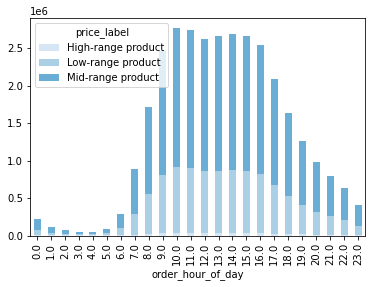

In [55]:
# bar chart showing when customers spend the most on different priced products
time_price_label_bar = time_price_label.plot(kind='bar', stacked=True, color = sns.color_palette('Blues', 5))

In [56]:
# Export bar chart
time_price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_price_label_bar.png'))

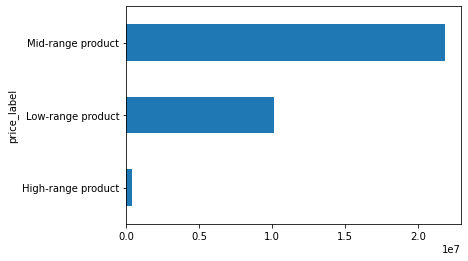

In [58]:
# Bar chart showing price range distribution 
price_label_bar = ords_prods_all.groupby('price_label').size().sort_values(ascending = True).plot.barh()

In [59]:
# Export bar chart
price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_label_bar.png'))

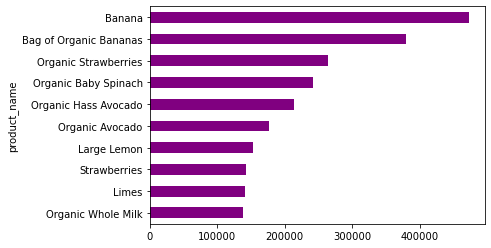

In [60]:
# Bar chart showing top 10 most popular products
product_bar = ords_prods_all.groupby('product_name').size().sort_values(ascending = True).tail(10).plot.barh(color = 'purple')

In [62]:
# Export bar chart
product_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_bar.png'))

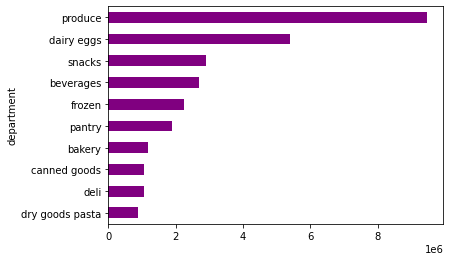

In [63]:
# Create bar chart of top 10 departments by count
top_10_depts = ords_prods_all.groupby('department').size().sort_values(ascending = True).tail(10).plot.barh(color = 'purple')

In [64]:
# Export bar chart
top_10_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_depts_bar.png'))

Text(0.5, 1.0, 'High/Low Spender by Loyalty Status')

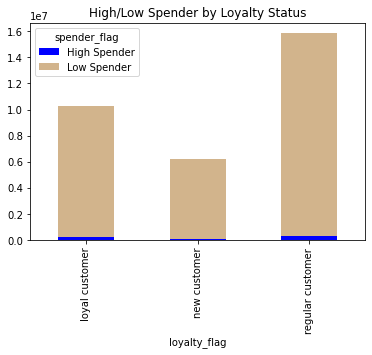

In [65]:
# Create stacked bar chart to show spending by loyalty status 
loyalty_spend_bar = loyalty_spend.plot(kind='bar', stacked=True, color = ['blue', 'tan'])
plt.title('High/Low Spender by Loyalty Status')

In [66]:
# Export bar chart
loyalty_spend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spend_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Loyalty Status')

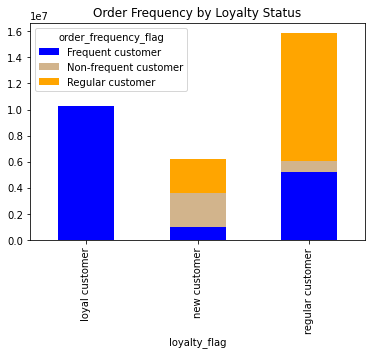

In [67]:
# Create stacked bar chart to show order frequency by loyalty status
loyalty_order_bar = loyalty_order.plot(kind='bar', stacked=True, color = ['blue', 'tan', 'orange'])
plt.title('Order Frequency by Loyalty Status')

In [73]:
# Export bar chart
loyalty_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_order_bar.png'))

Text(0.5, 1.0, 'Price of Products by Loyalty Status')

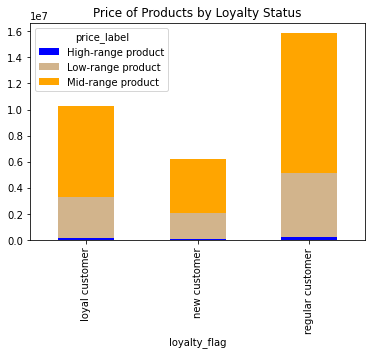

In [68]:
# Create stacked bar chart to show price label by loyalty status
loyalty_price_bar = loyalty_price.plot(kind='bar', stacked=True, color = ['blue', 'tan', 'orange'])
plt.title('Price of Products by Loyalty Status')

In [74]:
# Export bar chart
loyalty_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_bar.png'))

Text(0.5, 1.0, 'Spending by Age Group')

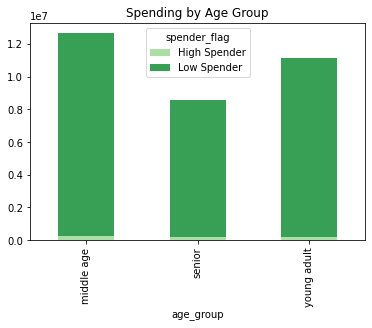

In [86]:
# Create stacked bar chart to show spending by age group
age_spend_bar = age_spend.plot(kind='bar', stacked=True, color = sns.color_palette('Greens', 2))
plt.title('Spending by Age Group')

In [87]:
# Export bar chart
age_spend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spend_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Age Group')

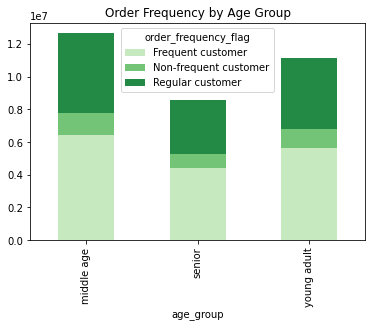

In [88]:
# Create stacked bar chart to show order frequency by age group
age_frequency_bar = age_frequency.plot(kind='bar', stacked=True, color = sns.color_palette('Greens', 3))
plt.title('Order Frequency by Age Group')

In [89]:
# Export bar chart
age_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_frequency_bar.png'))

Text(0.5, 1.0, 'Income Level by Region')

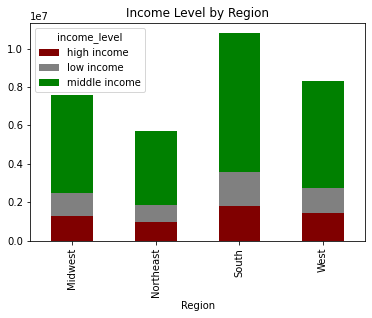

In [71]:
income_region_bar =income_region_crosstab.plot(kind='bar', stacked=True, color = ['maroon', 'grey', 'green'])
plt.title('Income Level by Region')

In [77]:
# Export bar chart
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Region')

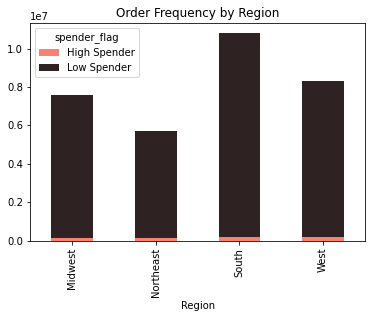

In [155]:
# Create bar chart of spending by region
spender_region_bar = spender_region.plot(kind='bar', stacked=True, color = sns.color_palette('dark:salmon_r', 2))
plt.title('Order Frequency by Region')

In [156]:
# Export bar chart
spender_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_region_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Region')

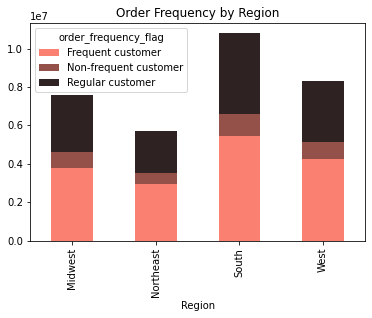

In [153]:
# Create bar chart of order frequency by region
freq_region_bar = freq_region.plot(kind='bar', stacked=True, color = sns.color_palette('dark:salmon_r', 3))
plt.title('Order Frequency by Region')

In [154]:
# Export bar chart
freq_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_region_bar.png'))

In [ ]:
# Create bar chart of order frequency by region
freq_region_bar = freq_region.plot(kind='bar', stacked=True, color = ['maroon', 'grey', 'green'])
plt.title('Order Frequency by Region')

Text(0.5, 1.0, 'Orders by Department and Age Group')

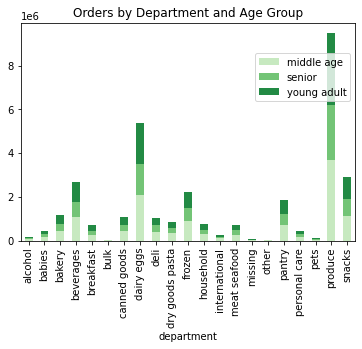

In [98]:
# Create bar chart to show orders by department and age group
dep_age_bar = dep_age.plot(kind='bar', stacked = True, color = sns.color_palette('Greens', 3))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Department and Age Group')

In [99]:
# Export bar chart
dep_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_age_bar.png'))

Text(0.5, 1.0, 'Spending by Marital Status')

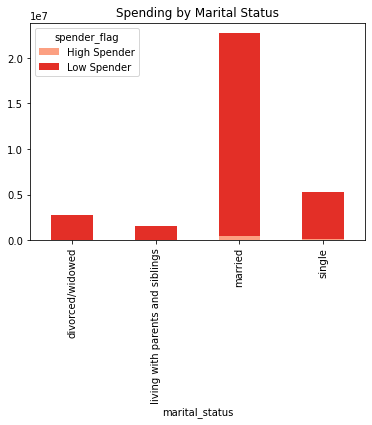

In [108]:
# Create stacked bar chart to show spending by marital status
mar_status_spend_bar = mar_status_spend.plot(kind='bar', stacked=True, color = sns.color_palette('Reds', 2))
plt.title('Spending by Marital Status')

In [107]:
# Export bar chart
mar_status_spend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mar_status_spend_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Marital Status')

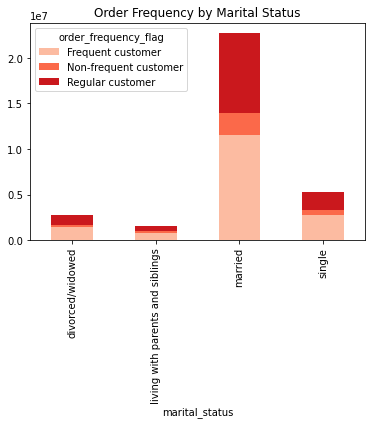

In [114]:
# Create stacked bar chart to show order frequency by marital status
mar_status_freq_bar = mar_status_frequency.plot(kind='bar', stacked=True, color = sns.color_palette('Reds', 3))
plt.title('Order Frequency by Marital Status')

In [115]:
# Export bar chart
mar_status_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mar_status_freq_bar.png'))

Text(0.5, 1.0, 'Orders by Department and Marital Status')

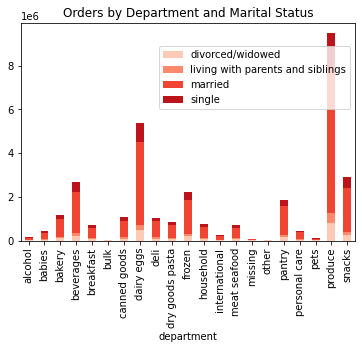

In [97]:
# Create bar chart to show orders by department and marital status
mar_status_dep_bar = mar_status_dep.plot(kind='bar', stacked = True, color = sns.color_palette('Reds', 4))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Department and Marital Status')

In [131]:
# Export bar chart
mar_status_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mar_status_dep_bar.png'))

Text(0.5, 1.0, 'Spending by Family Status')

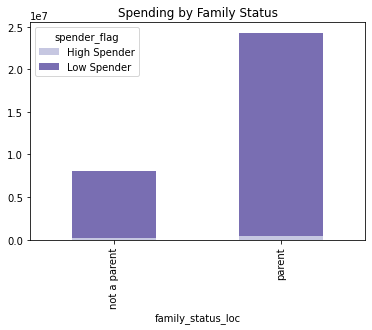

In [129]:
# Create stacked bar chart to show spending by family status
fam_status_spend_bar = fam_status_spend.plot(kind='bar', stacked=True, color = sns.color_palette('Purples', 2))
plt.title('Spending by Family Status')

In [132]:
# Export bar chart
fam_status_spend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_spend_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Family Status')

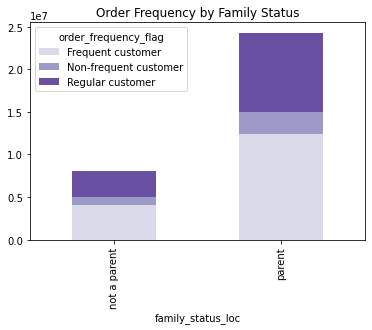

In [130]:
# Create stacked bar chart to show order frequency by familiy status
fam_status_freq_bar = fam_status_frequency.plot(kind='bar', stacked=True, color = sns.color_palette('Purples', 3))
plt.title('Order Frequency by Family Status')

In [133]:
# Export bar chart
fam_status_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_freq_bar.png'))

Text(0.5, 1.0, 'Orders by Department and Family Status')

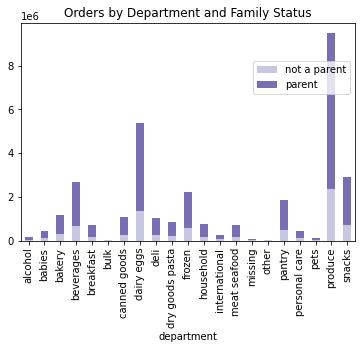

In [160]:
# Create bar chart to show orders by department and family status
fam_status_dep_bar = fam_status_dep.plot(kind='bar', stacked = True, color = sns.color_palette('Purples', 2))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Department and Family Status')

In [137]:
# Export bar chart
fam_status_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_dep_bar.png'))

In [157]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_order,spender_flag,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,marital_status,income,_merge,Region,age_group,income_level,family_status_loc,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regular busy,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages


Text(0.5, 1.0, 'User Income Level by Age')

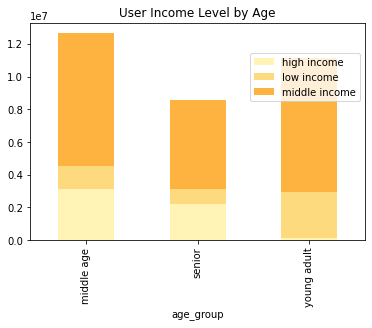

In [202]:
# Create bar chart to show user income by age 
age_income_bar = age_income.plot(kind='bar', stacked = True, color = sns.color_palette("YlOrBr"))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('User Income Level by Age')

In [203]:
# Export bar chart
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_bar.png'))

Text(0.5, 1.0, 'Order Frequency by Income Level')

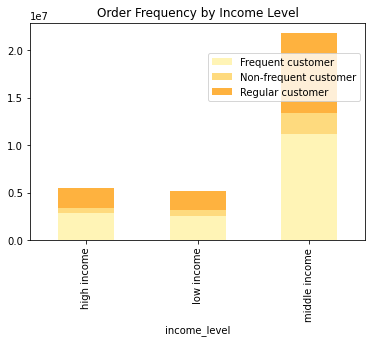

In [188]:
# Create bar chart to show order frequency by income level
income_order_bar = income_order.plot(kind='bar', stacked = True, color = sns.color_palette("YlOrBr"))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Order Frequency by Income Level')

In [200]:
# Export bar chart
income_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_order_bar.png'))

Text(0.5, 1.0, 'Orders by Department and Income Level')

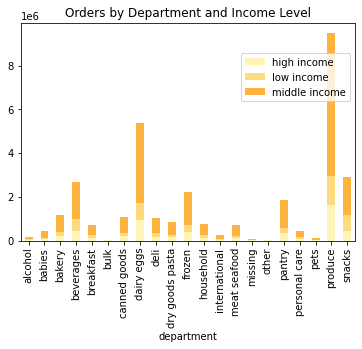

In [193]:
# Create bar chart to show order frequency by income level
income_dep_bar = income_dep.plot(kind='bar', stacked = True, color = sns.color_palette("YlOrBr"))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Department and Income Level')

In [201]:
# Export bar chart
income_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dep_bar.png'))

Text(0.5, 1.0, 'Orders by Age Group and Day of Week')

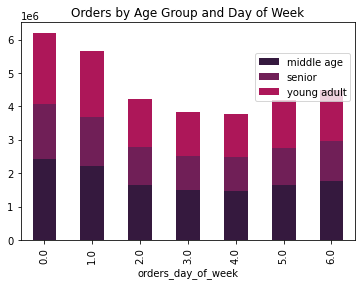

In [222]:
# Create bar chart to show order frequency by income level
age_day_bar = age_day.plot(kind='bar', stacked = True, color = sns.color_palette("rocket"))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Age Group and Day of Week')

In [ ]:
# Export bar chart
age_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_day_bar.png'))

Text(0.5, 1.0, 'Orders by Income Level and Price Range')

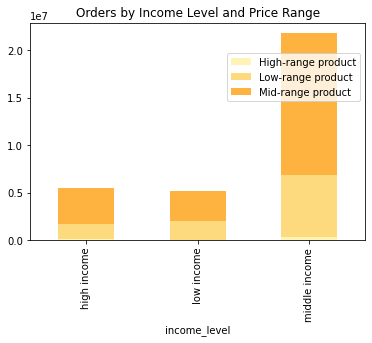

In [216]:
# Create bar chart to show order frequency by income level
price_income_bar = test1.plot(kind='bar', stacked = True, color = sns.color_palette("YlOrBr"))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.title('Orders by Income Level and Price Range')

In [217]:
# Export bar chart
price_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_income_bar.png'))